In [559]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.8


In [452]:
from matplotlib import font_manager
font_manager.fontManager.addfont('/cluster/groups/Wangxiaonan/share/yingjun/arial.ttf')
plt.rcParams['font.sans-serif'] = 'Arial'

# 3D UMAP

In [2]:
adata = sc.read('./write/AdultMice_inner_umap3d.h5ad')

In [3]:
sc.pl.umap(adata,projection='3d',color='ctsub2')

<IPython.core.display.Javascript object>

KeyError: 'CT'

# Gene Lists

In [222]:
glcus = ['nfkb1', 'nfkb2', 'tnfa', 'il1b', 'il6', 'il4', 'il10','il11a','il11b', 'rln3a', 'tnfrsf1b', 'arg2']

In [542]:
infla = ['ccr2','csf1a','csf1b','ccl35.1','ccl35.2','cxcl12a','cxcl12b','cxcr4a','cxcr4b','il1b','il6','il10','nfkb1','rela','tlr2','tnfa','tnfb','cd74a','cd74b','mhc2dab']

In [101]:
mesen = ['col1a1a','col1a1b','col1a2','fn1a','fn1b','mfap4','mfap5','tagln','bgna','bgnb','serpine1']

# Scoring on Endo (dumpped)

In [466]:
adata = sc.read('./write/Endo_Hu_processed.h5ad')

In [467]:
adata = anndata.AnnData(X=adata.raw.X.A,var=adata.raw.var,obs=adata.obs,obsm=adata.obsm)

In [468]:
sc.pp.scale(adata,max_value=10)#Must scale!!!!

In [469]:
np.max(adata.X)

10.0

In [283]:
mks = pd.read_excel('./Files/Dasilva_markers_list.xlsx',index_col='cluster',dtype='str')

In [291]:
mks['cluster'] = mks.index

In [292]:
clus_cat = mks['cluster'].astype('category').cat.categories

In [294]:
mkls = {}

In [470]:
for x in clus_cat:
    mkls[x] = np.intersect1d(mks.loc[x,'gene'].values,adataA.raw.var_names)
    sc.tl.score_genes(adata,gene_list=mkls[x],score_name=f'score_endo_c{x}')

computing score 'score_endo_c1'
    finished: added
    'score_endo_c1', score of gene set (adata.obs).
    147 total control genes are used. (0:00:12)
computing score 'score_endo_c2'
    finished: added
    'score_endo_c2', score of gene set (adata.obs).
    145 total control genes are used. (0:00:12)
computing score 'score_endo_c3'
    finished: added
    'score_endo_c3', score of gene set (adata.obs).
    146 total control genes are used. (0:00:12)
computing score 'score_endo_c4'
    finished: added
    'score_endo_c4', score of gene set (adata.obs).
    150 total control genes are used. (0:00:12)
computing score 'score_endo_c5'
    finished: added
    'score_endo_c5', score of gene set (adata.obs).
    197 total control genes are used. (0:00:12)
computing score 'score_endo_c6'
    finished: added
    'score_endo_c6', score of gene set (adata.obs).
    343 total control genes are used. (0:00:12)
computing score 'score_endo_c7'
    finished: added
    'score_endo_c7', score of gene s

In [471]:
sname = [x for x in adata.obs_keys() if 'score_endo_c' in x]

In [472]:
adata.obs['t2'] = np.std(adata.obs[sname], axis=1)

In [473]:
s2 = adata.obs[sname].max(axis=1)

In [474]:
adata.obs['s2'] = s2

In [475]:
sc.pl.umap(adata,color='s2',cmap='bwr',title='Score',
          save='_endo_s2.pdf',
          )

<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


In [476]:
adata.obs['Score_endo']=adata.obs.s2

In [477]:
adata.obs.keys()

Index(['Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain',
       'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender',
       'Author', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'batch', 'n_counts', 'phase',
       'S_score', 'G2M_score', 'EGFP', 'FishID', 'Treatment', 'RFP',
       'db_scores', 'FishID_new', 'CellID', 'Cell', 'orig.ident', 'nCount_RNA',
       'nFeature_RNA', 'percent.mito', 'time', 'morphine', 'AV', 'inhib',
       'so.far.ident.subtypes', 'so.far.ident', 'RNA_snn_res.4',
       'seurat_clusters', 'work.ident', 'fibro.subtypes', 'is.inhib',
       'split.inhib', 'zoom.ident', 'zoom.subtypes', 'plot.ident', 'CM.ident',
       'paper.ident', 'RNA_snn_res.2', 'RNA_snn_res.3', 'RN

In [478]:
ax = pd.DataFrame(adata.obs['Score_endo']).plot.kde(xlim=(-0.5,1.5))
ax.axvline(0.05, linestyle='--', color='orange')
plt.savefig('./figures/s2_endo_density.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


In [479]:
Tn = adata.obs[sname].idxmax(axis=1)

In [480]:
adata.obs['Tn'] = ['Endo'+re.sub('score_endo', '',x) for x in Tn]

In [481]:
tk = [adata.obs.Tn[x] if adata.obs.s2[x]>0.05 else 'Unknown' for x in adata.obs_names]

In [482]:
adata.obs['Tn2'] = tk

In [483]:
adata.obs['Tn'].value_counts()

Endo_c7     9570
Endo_c2     7145
Endo_c4     5970
Endo_c1     5451
Endo_c3     5415
Endo_c5     3068
Endo_c6     2881
Endo_c10    2651
Endo_c9     2139
Endo_c14    1894
Endo_c13    1083
Endo_c8      893
Endo_c11     695
Endo_c12     691
Name: Tn, dtype: int64

In [484]:
adata.obs['Tn2'].value_counts()

Endo_c7     9323
Endo_c2     7126
Endo_c4     5816
Endo_c1     5390
Endo_c3     5347
Endo_c5     2900
Endo_c6     2835
Endo_c10    2613
Endo_c9     2122
Endo_c14    1847
Endo_c13    1070
Unknown     1013
Endo_c8      883
Endo_c12     640
Endo_c11     621
Name: Tn2, dtype: int64

In [345]:
adata2 = adata[adata.obs.Tn2!='NA']

In [395]:
pal0 = adata.uns['Tn2_colors']
pal = pal0.copy()
pal[-1] = '#eeeeee'

In [417]:
pal

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#eeeeee'], dtype=object)

In [489]:
sc.pl.umap(adata,color='cxcr4b',wspace=0.5,title='Endo',save='_endo_scored.pdf'
           ,size=10
          )

<IPython.core.display.Javascript object>

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
meta NOT subset; don't know how to subset; dropped


In [485]:
adata.write('./write/Endo_Hu_processed_scored.h5ad')

In [486]:
adata0 = sc.read('./write/Endo_Hu_processed.h5ad')

In [487]:
adata0.obs['Cardeira_cluster'] = adata.obs['Tn2']

In [488]:
adata0.write('./write/Endo_Hu_processed.h5ad')

In [536]:
adata0 = sc.read('./write/Endo_Hu_processed.h5ad')

In [537]:
All_wt_filtered.obs['Endo_type'] = adata0.obs['Endo_type']

In [538]:
All_wt_filtered.obs['inflammatory_Endo'] = ['Inflam.Endo' if All_wt_filtered.obs['Endo_type'][x]=='Inflam.Endo' else 'Other cell' for x in All_wt_filtered.obs_names] 

In [541]:
sc.pl.umap(All_wt_filtered,color='inflammatory_Endo',size=20,groups=['Inflam.Endo'],palette=['red'],
          save='_All_wt_filtered_inflam_Endo.pdf')

<IPython.core.display.Javascript object>

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
meta NOT subset; don't know how to subset; dropped


## Get new markers

In [500]:
adata = sc.read('./write/Endo_Hu_processed.h5ad')

In [501]:
sc.tl.rank_genes_groups(adata,groupby='Cardeira_cluster',key_added='DE_SubEndo')

ranking genes
    finished: added to `.uns['DE_SubEndo']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


In [502]:
df = pd.DataFrame(adata.uns[f'DE_SubEndo']['names']).head(100)
df.to_excel(f'./Files/SubEndo_100DEG.xlsx')

In [503]:
adata.write('./write/Endo_Hu_processed.h5ad')

In [496]:
infla_Cardeira = ['ccl35.1','ccl36.1','ccr9a','c1qa','c1qc','cxcr4b','ptprc','mpeg1.1','lcp1','spi1b']

In [498]:
sc.pl.dotplot(adata,groupby='Cardeira_cluster',var_names=infla_Cardeira,swap_axes=True,dot_max=1,
                    standard_scale='var',title=f'Inflammatory genes (Cardeira)',
              save=f'Endo_subcluster_infla_genes.pdf'
                   )

<IPython.core.display.Javascript object>

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
meta NOT subset; don't know how to subset; dropped


In [505]:
sc.pl.dotplot(adata,groupby='Leiden_endo',var_names=infla_Cardeira,swap_axes=True,dot_max=1,
                    standard_scale='var',title=f'Inflammatory genes (leiden)',
              save=f'Endo_self_cluster_infla_genes.pdf'
                   )

<IPython.core.display.Javascript object>

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
meta NOT subset; don't know how to subset; dropped


# General Gene Expression UMAP

## Prepare sample

In [556]:
pd.DataFrame(All_wt_filtered.obs['CT_new2'].cat.categories,All_wt_filtered.uns['CT_new2_colors'])

,0
#bfef45,B-cells
#fabed4,Bl.ves.EC
#469990,Cardiomyocytes
#dcbeff,Endocardium
#9A6324,Epicardium
#42d4f4,Fibroblasts
#023fa5,"Leiden_v2_Cluster25,0"
#7d87b9,"Leiden_v2_Cluster25,1"
#bec1d4,"Leiden_v2_Cluster25,2"
#11c638,"Leiden_v2_Cluster25,3"


In [509]:
All_wt_filtered = sc.read('./write/All_outer_filtered.h5ad')

In [93]:
sc.pl.umap(Endo_wt_filtered[Endo_wt_filtered.obs.Day=='2'],color='il1b',save='1.pdf')

<IPython.core.display.Javascript object>

In [282]:
adata.obs['Days'] = 'Day'+adata.obs['Day'].astype('str')
adata.obs['Days'] = adata.obs['Days'].astype('category')

In [285]:
adata.obs['Days'] = adata.obs['Days'].cat.reorder_categories(['Day0', 'Day2', 'Day3', 'Day14','Day7','Day30'])

In [289]:
adata.obs['CT_Final'].cat.categories

Index(['B-cells', 'Bl.ves.EC', 'Cardiomyocytes ', 'Endocardium ',
       'Epicardium ', 'Fibroblasts ', 'EHT-2', 'EHT-4', 'EHT-3', 'EHT-1',
       'Lymphatic cells', 'Macrophage 1', 'Macrophage 2', 'Monocytes',
       'Myelin cells', 'Neuronal cells', 'Neutrophils', 'Perivascular cells',
       'Proliferating cells', 'Smooth muscle cells', 'T-cells', 'Thrombocytes',
       'Valve fibroblasts'],
      dtype='object')

In [298]:
adata.uns['CT_Final_colors']=adata.uns['CT_new2_colors']

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


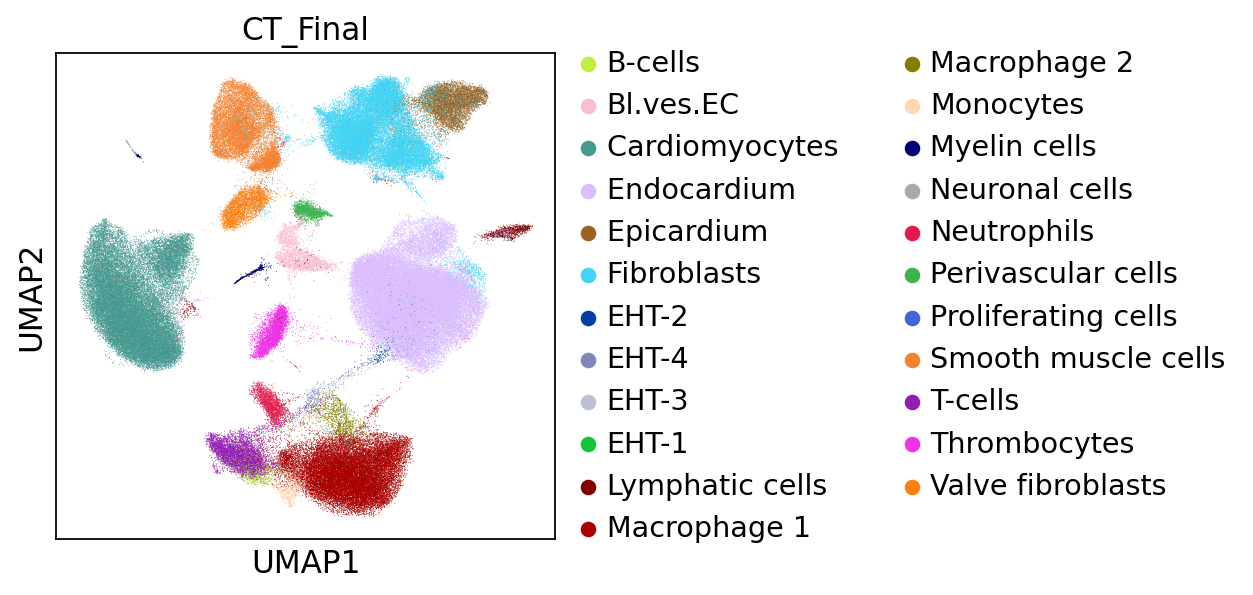

In [299]:
sc.pl.umap(adata,color='CT_Final',save='1.pdf')

In [300]:
adata.write('./write/All_outer_filtered.h5ad')

In [301]:
adata1 = adata[np.in1d(adata.obs.CT_Final,np.array(['Endocardium ','EHT-1','EHT-2','EHT-3','EHT-4',
                                                    'Proliferating cells','Macrophage 1','Macrophage 2','Monocytes',
                                                    'T-cells','B-cells','Thrombocytes','Lymphatic cells']))]

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


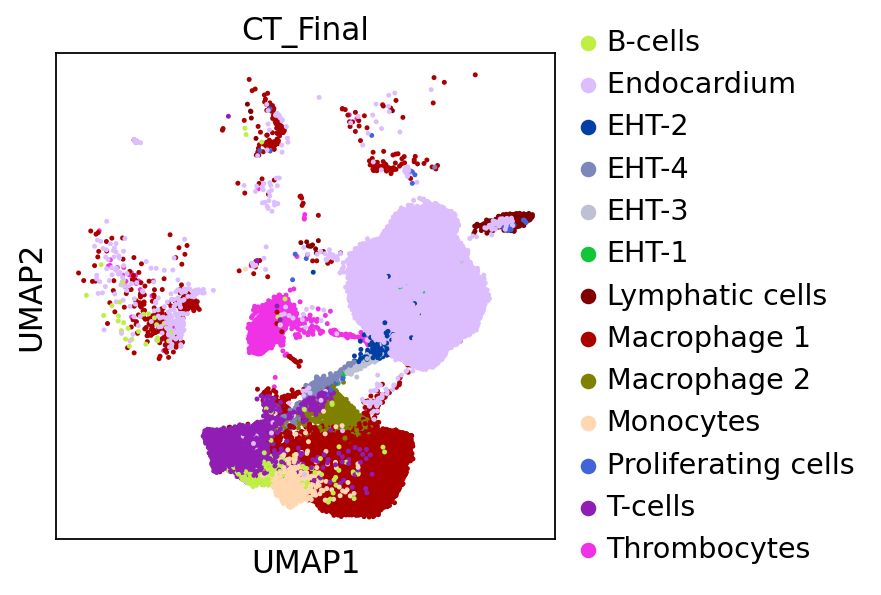

In [302]:
sc.pl.umap(adata1,color='CT_Final',save='_WT_filtered_EHT.pdf',size=20)

In [324]:
adata1 = adata[np.in1d(adata.obs.CT_Final,np.array(['Endocardium ','EHT-1','EHT-2','EHT-3','EHT-4',
                                                    'Proliferating cells','Macrophage 2']))]

In [325]:
c20_4 = adata[adata.obs.Leiden_sub_c20=='20,4']
c16_5 = adata[adata.obs.Leiden_sub_c16=='16,5']
c27 = adata[adata.obs.Leiden_v2=='27']

In [326]:
c20_4.obs['CT_Final'] = 'TtoM'
c16_5.obs['CT_Final'] = 'EtoT'
c27.obs['CT_Final'] = 'EtoM'

/tmp/ipykernel_189446/3617095479.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  c20_4.obs['CT_Final'] = 'TtoM'
/tmp/ipykernel_189446/3617095479.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  c16_5.obs['CT_Final'] = 'EtoT'
/tmp/ipykernel_189446/3617095479.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  c27.obs['CT_Final'] = 'EtoM'


In [327]:
adata1 = anndata.concat([adata1,c20_4,c16_5,c27])

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


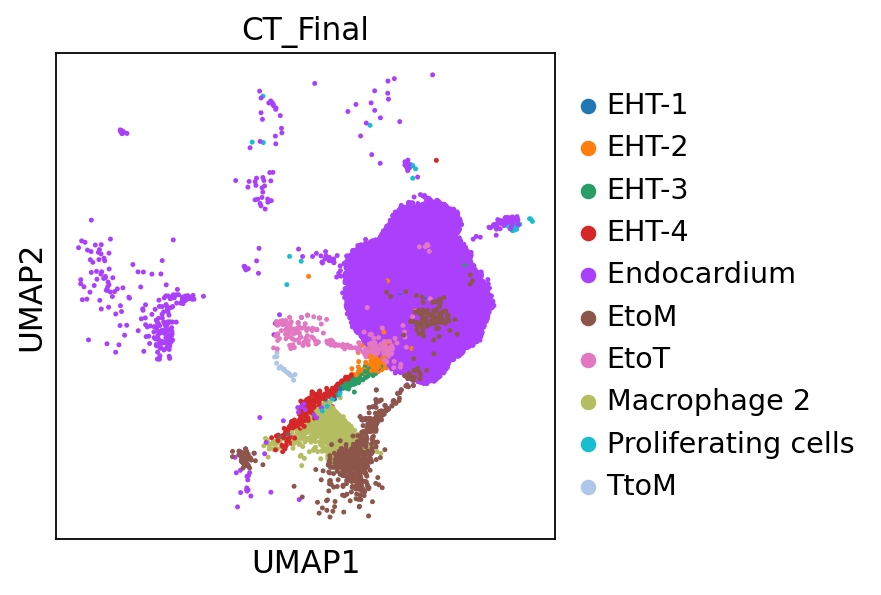

In [329]:
sc.pl.umap(adata1,color='CT_Final',save='_WT_filtered_EHT.pdf',size=20)

In [ ]:
adata1.write('./write/EHT_WT_filtered.h5ad')

In [205]:
adata1 = sc.read('./write/c25_wt_filtered.h5ad')

In [207]:
adata1.obs.Condition.value_counts()

Injured    707
Healthy    202
Name: Condition, dtype: int64

In [213]:
adata1.raw.var_names[adata1.raw.var_names.str.startswith('mhc2')]

Index(['mhc2a', 'mhc2b', 'mhc2bl', 'mhc2dab', 'mhc2dbb'], dtype='object')

In [221]:
Endo_wt_filtered.shape

(53235, 9468)

In [227]:
Endo_wt_filtered.obs.Day = [0 if Endo_wt_filtered.obs.Condition[x]=='Healthy' else Endo_wt_filtered.obs.Day[x] for x in Endo_wt_filtered.obs_names]

In [230]:
Endo_wt_filtered.obs.Day = Endo_wt_filtered.obs.Day.astype('str')

In [231]:
Endo_wt_filtered.write('./write/Endo_wt_filtered.h5ad')

## Plot overall

In [525]:
samp = 'c25_wt_filtered'
glcus = ['cd74a','cd74b','mhc2a', 'mhc2dab']
size = 10 if samp.startswith('All') else 50
adataToA = eval(samp)

for gene in glcus:
    sc.pl.umap(adataToA,color=gene,title=f'{samp}_{gene}',cmap=cmap,
               size=size,
               save=f'_{samp}_{gene}.pdf'
              )

<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


In [527]:
adataToA.raw.var_names[adataToA.raw.var_names.str.startswith('mhc2')]

Index(['mhc2a', 'mhc2b', 'mhc2bl', 'mhc2dab', 'mhc2dbb'], dtype='object')

## Plot by group

In [462]:
samp = 'cus_data2'
adataToA = eval(samp)
adataToA_raw = anndata.AnnData(X=adataToA.raw.X,var=adataToA.raw.var,obs=adataToA.obs)
glcus = ['ccl35.1','cxcr4b','ccr9a','mpeg1.1','lcp1','cd74a','cd74b','mhc2a','mhc2ab']

for gene in glcus:
    maxexp = np.max(adataToA_raw[:,gene].X)
    for day in adata.obs['Condition'].cat.categories:
        adata_sub = adataToA[adataToA.obs.Condition==day]
        sc.pl.umap(adata_sub,color=gene,title=f'{samp}_{gene}_{day}',cmap=cmap,
                   vmax=max(0.1,maxexp),size=50,
                  save=f'_{samp}_{gene}_{day}.pdf'
                  )

<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


KeyError: 'mhc2ab'

In [269]:
adataToA.obs.EHT.value_counts().sum()

909

In [231]:
pd.crosstab(adataToA.obs.Genotype,adataToA.obs.)

WT          1253
kit-/-       503
runx1-/-     317
Name: Genotype, dtype: int64

# Cell annotation UMAP

In [184]:
sc.pl.umap(adataToA,color=CTname,size=20,groups=['dbpos_Day3'],
           #save=f'{samp}_{CTname}.pdf'
          save='1.pdf')

<IPython.core.display.Javascript object>

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [194]:
adata = sc.read('/cluster/groups/Wangxiaonan/share/rev_MI/Analysis_zebrafish/adata_paga_int_leiden.h5ad')

In [201]:
color = 'Leiden_v2'
sc.pl.umap(adata,color=color,save=f'{color}.pdf',legend_loc='on data',legend_fontsize='xx-small')

<IPython.core.display.Javascript object>

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


# Dotplots

## Sample read in 

In [5]:
c25_wt_filtered = sc.read('./write/c25_wt_filtered.h5ad')

In [6]:
c25_wt_filtered.obs.EHT.value_counts().sum()

909

In [16]:
adata0 = sc.read('./write/All_outer_filtered.h5ad')

In [20]:
Endo_wt_filtered = adata0[adata0.obs.CT_Final=='Endocardium ']

In [22]:
Endo_wt_filtered.write('./write/Endo_wt_filtered.h5ad')

In [32]:
Endo_wt_filtered.obs['Cell_type']

H5_AAACCTGAGCACGCCT-3              Endocardium (Ventricle)
H5_AAACCTGAGTGAATTG-3                 Endocardium (Atrium)
H5_AAACGGGAGCCTTGAT-3              Endocardium (Ventricle)
H5_AAAGATGAGTAGCCGA-3                 Endocardium (Atrium)
H5_AACACGTCACGTGAGA-3                 Endocardium (Atrium)
                                            ...           
wt_7dpi_2_TTTGGTTTCGTTTGCC-11-5    Endocardium (Ventricle)
wt_7dpi_2_TTTGGTTTCTGGAGCC-11-5       Endocardium (Atrium)
wt_7dpi_2_TTTGTCAAGCGTTGCC-11-5       Endocardium (Atrium)
wt_7dpi_2_TTTGTCACAGTTCCCT-11-5    Endocardium (Ventricle)
wt_7dpi_2_TTTGTCAGTTTAGGAA-11-5    Endocardium (Ventricle)
Name: Cell_type, Length: 53235, dtype: category
Categories (3, object): ['Endocardium (Atrium)', 'Endocardium (Ventricle)', 'Endocardium (frzb)']

In [41]:
Koth = sc.read('./write/tilly_all.h5ad')

In [45]:
Koth_wt = Koth[Koth.obs.Genotype=='WT']

In [46]:
dbpos_wt = Koth_wt[Koth_wt.obs.dbpos=='dbpos']

In [82]:
dbpos_wt.obs['louvain_dbpos'] = 'louvain-'+dbpos_wt.obs['louvain_dbpos'].astype('str')

In [185]:
dbpos_wt.write('./write/dbpos_wt.h5ad')

## Renaming Sample

In [431]:
samp = 'Endo'
adataA = dbpos_wt if samp=='dbpos' else eval(samp+'_wt_filtered')
key = 'EHT' if samp=='EHT' else 'Days'

adataA.obs['Custom'] = (f'{samp}_'+adataA.obs[key].astype('str')).astype('category')
adataA = adataA[adataA.obs.Day!='2']
adataA = adataA[adataA.obs.Day!='14']
if samp=='Endo':
    adataA.obs['Custom'] = adataA.obs['Custom'].cat.reorder_categories([f'{samp}_Day0',f'{samp}_Day3',f'{samp}_Day7',f'{samp}_Day30'])

Endo_cus = adataA # the same for c25 and dbpos

/tmp/ipykernel_455204/564835426.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adataA.obs['Custom'] = adataA.obs['Custom'].cat.reorder_categories([f'{samp}_Day0',f'{samp}_Day3',f'{samp}_Day7',f'{samp}_Day30'])


In [435]:
Endo_cus.obs['Cardeira_cluster'] = Endo_wt_filtered.obs.Cardeira_cluster

In [436]:
Endo_cus2 = Endo_cus[Endo_cus.obs.Cardeira_cluster=='Endo_c10']

In [437]:
cus_data2 = anndata.concat([dbpos_cus,c25_cus,Endo_cus2])

In [439]:
cus_data2.obs.Custom.value_counts()

Endo_Day0     1396
Endo_Day7     1251
Endo_Day3      564
c25_EHT-2      344
c25_EHT-4      293
dbpos_Day3     258
Endo_Day30     148
c25_EHT-1      108
dbpos_Day0      99
c25_EHT-3       94
Name: Custom, dtype: int64

In [444]:
cus_data2.obs.Custom.cat.categories

Index(['Endo_Day0', 'Endo_Day3', 'Endo_Day7', 'Endo_Day30', 'c25_EHT-1',
       'c25_EHT-2', 'c25_EHT-3', 'c25_EHT-4', 'dbpos_Day0', 'dbpos_Day3'],
      dtype='object')

In [447]:
cus_data2.obs.Custom = cus_data2.obs.Custom.cat.rename_categories({'Endo_Day0':'Endo_c10_Day0', 
                                                                   'Endo_Day3':'Endo_c10_Day3', 
                                                                   'Endo_Day7':'Endo_c10_Day7', 
                                                                   'Endo_Day30':'Endo_c10_Day30'})

In [448]:
cus_data2.write('./write/cus_data_Endo10_c25_dbpos_wt.h5ad')

In [459]:
cus_data2.obs['WT'] = cus_data2.obs['Custom']

## Plotting Dotplots

In [545]:
samp = 'cus_data'
adataToA = eval(samp)
listname = 'Inflam_0703'
#gltoA = gl1 if listname == 'HM' else (gl2 if listname =='KEGG_Cytokine' else glcus)
gltoA = infla
#CTname = 'EHT' if samp=='c25_wt_filtered' else ('Cell_type' if samp=='Endo_wt_filtered' else 'louvain_dbpos')
CTname = 'WT'
#split = 'Day'
filt = True

add_breaks = False
groupby =  f'{CTname}_{split}' if add_breaks else CTname
#groupby = 'Day'

lenCTname = len(adataToA.obs[CTname].astype('category').cat.categories)
lensplit = len(adataToA.obs[split].astype('category').cat.categories)

breaks = [x*lensplit for x in list(range(1,lenCTname))]

if CTname == 'EHT':
    breaks[2] = breaks[2]-1

if filt:
    adataToA = adataToA[adataToA.obs.Day!='2']
    adataToA = adataToA[adataToA.obs.Day!='14']
adataToA.obs['Days'] = ('Day'+adataToA.obs['Day'].astype('str')).astype('category')
adataToA.obs[f'{CTname}_Day'] = adataToA.obs[CTname].astype('str')+'_'+adataToA.obs['Days'].astype('str')

fig = sc.pl.dotplot(adataToA,groupby=groupby,var_names=gltoA,swap_axes=True,dot_max=1,
                    standard_scale='var',title=f'{samp}_{groupby}',return_fig=True
              #save=f'{samp}_{listname}_{groupby}.pdf'
                   )
ax = fig.get_axes()['mainplot_ax']
if add_breaks:
    ax.vlines(breaks,0,len(gltoA),linestyles='--')

plt.savefig(f'./figures/dotplot_{samp}_{listname}_{groupby}.pdf',bbox_inches='tight')

/tmp/ipykernel_455204/4285313944.py:26: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adataToA.obs['Days'] = ('Day'+adataToA.obs['Day'].astype('str')).astype('category')


<IPython.core.display.Javascript object>

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
meta NOT subset; don't know how to subset; dropped


In [544]:
All_wt_filtered.write('./write/All_outer_filtered.h5ad')

In [ ]:
samp = 'dbpos'
listname = 'HM'
adataToA = dbposA
gltoA = gl1 if listname == 'HM' else gl2
sc.pl.dotplot(adataToA,groupby='Sample',var_names=np.intersect1d(adataToA.raw.var_names,gltoA),swap_axes=True,standard_scale='var',title=samp,
              save=f'{samp}_inflammatory_{listname}.pdf')

In [192]:
Endo.obs['Days'] = 'Day'+Endo.obs['Day'].astype('str')

/tmp/ipykernel_189446/2343557154.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  Endo.obs['Days'] = 'Day'+Endo.obs['Day'].astype('str')


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


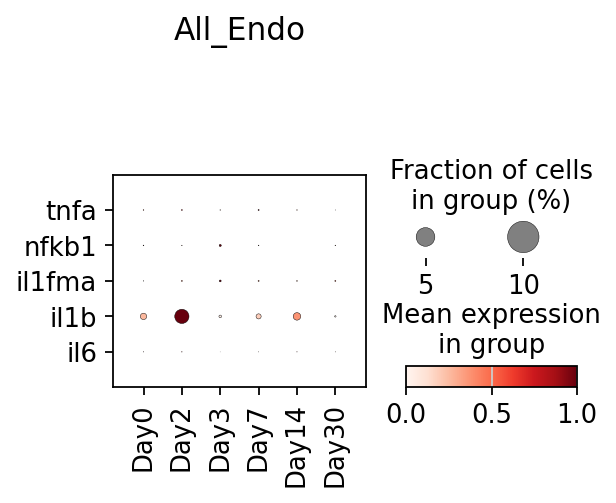

In [194]:
samp = 'All_Endo'
adataToA = Endo
sc.pl.dotplot(adataToA,groupby='Days',var_names=['tnfa','nfkb1','il1fma','il1b','il6'],swap_axes=True,standard_scale='var',title=samp,
              save=f'{samp}_inflammatory_1.pdf')

In [ ]:
samp = 'All_Endo'
listname = 'KEGG_Cytokine'
adataToA = Endo
gltoA = gl1 if listname == 'HM' else gl2
sc.pl.dotplot(adataToA,groupby='Days',var_names=np.intersect1d(adataToA.raw.var_names,gltoA),swap_axes=True,standard_scale='var',title=samp,
              save=f'{samp}_inflammatory_{listname}.pdf')

# Koth compare

In [574]:
adata1 = Koth
samp = 'Koth'

GL = ['myb','gata2b','alas2','mpeg1.1','sla2']

adataSub1 = adata1[(adata1.obs.Condition!='Injured')&(adata1.obs.Genotype=='WT')]
adataSub1.obs['SubSample'] = f'{samp}_WT_Uninjured'
adataSub2 = adata1[(adata1.obs.Condition=='Injured')&(adata1.obs.Genotype=='WT')]
adataSub2.obs['SubSample'] = f'{samp}_WT_3dpi'
adataSub3 = adata1[(adata1.obs.Condition=='Injured')&(adata1.obs.Genotype=='runx1-/-')]
adataSub3.obs['SubSample'] = f'{samp}_runx1ko_3dpi'

for toplot in GL:
    adata_raw = anndata.AnnData(X=adata1.raw.X,var=adata1.raw.var,obs=adata1.obs)
    adataOnly = adata_raw[:,[toplot]]

    # fig,ax = plt.subplots(3,1,figsize=(4.3,10),sharex=True,sharey=True)
    fig,ax = plt.subplots(1,3,
                          figsize=(10,3.3),
                          sharex=True,sharey=True)
    sz = 10
    maxexp = max(1,np.max(adataOnly.X))
    medexp = maxexp/2
    sc.pl.umap(adataSub1,color=[toplot],size=sz,cmap=cmap,
               vmax=maxexp,vcenter=medexp,legend_loc=None,
               title=f'{toplot}_{adataSub1.obs.SubSample[0]}',ax=ax[0],show=False)
    sc.pl.umap(adataSub2,color=[toplot],size=sz,cmap=cmap,
               vmax=maxexp,vcenter=medexp,legend_loc=None,
               title=f'{toplot}_{adataSub2.obs.SubSample[0]}',ax=ax[1],show=False)
    sc.pl.umap(adataSub3,color=[toplot],size=sz,cmap=cmap,
               vmax=maxexp,vcenter=medexp,
               title=f'{toplot}_{adataSub3.obs.SubSample[0]}',ax=ax[2],show=False)
    fig.tight_layout()
    #plt.savefig(f'./figures/{samp}_{toplot}_compare.png')
    #plt.savefig(f'./figures/{samp}_{toplot}_compare.pdf')
    plt.savefig(f'./figures/{samp}_{toplot}_compare.pdf')

/tmp/ipykernel_455204/2069539256.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adataSub1.obs['SubSample'] = f'{samp}_WT_Uninjured'
/tmp/ipykernel_455204/2069539256.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adataSub2.obs['SubSample'] = f'{samp}_WT_3dpi'
/tmp/ipykernel_455204/2069539256.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adataSub3.obs['SubSample'] = f'{samp}_runx1ko_3dpi'


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


# WT, KO, Koth_3dpi

In [567]:
Koth.obs.Index

AAACCTGCAATCAGAA-1-0    GSM4101380
AAACCTGCAGCTGCAC-1-0    GSM4101380
AAACCTGCATCCTTGC-1-0    GSM4101380
AAACCTGCATTGGTAC-1-0    GSM4101380
AAACCTGTCTCAAACG-1-0    GSM4101380
                           ...    
TTTGTCAGTCCGACGT-1-2    GSM4101382
TTTGTCAGTGCTAGCC-1-2    GSM4101382
TTTGTCATCAGCCTAA-1-2    GSM4101382
TTTGTCATCATGTAGC-1-2    GSM4101382
TTTGTCATCTAGCACA-1-2    GSM4101382
Name: Index, Length: 12838, dtype: category
Categories (3, object): ['GSM4101380', 'GSM4101381', 'GSM4101382']

In [571]:
adata1 = c25
samp = 'c25'

adataSub1 = adata1[(adata1.obs.Condition=='Injured')&(adata1.obs.Genotype=='WT')]
adataSub1.obs['SubSample'] = f'{samp}_WT_All_Injured'
adataSub2 = adata1[(adata1.obs.Condition=='Injured')&(adata1.obs.Genotype=='runx1-/-')]
adataSub2.obs['SubSample'] = f'{samp}_runx1ko_All_Injured'
adataSub3 = adata1[(adata1.obs.Condition=='Injured')&(adata1.obs.Genotype=='WT')&(adata1.obs.Author=='Koth')]
adataSub3.obs['SubSample'] = f'{samp}_Koth_WT_3dpi'

for toplot in GL:
    adata_raw = anndata.AnnData(X=adata1.raw.X,var=adata1.raw.var,obs=adata1.obs)
    adataOnly = adata_raw[:,[toplot]]

    # fig,ax = plt.subplots(3,1,figsize=(4.3,10),sharex=True,sharey=True)
    fig,ax = plt.subplots(1,3,
                          figsize=(10,3.3),
                          sharex=True,sharey=True)
    sz = 20
    maxexp = max(1,np.max(adataOnly.X))
    medexp = maxexp/2
    sc.pl.umap(adataSub1,color=[toplot],size=sz,cmap=cmap,
               vmax=maxexp,vcenter=medexp,legend_loc=None,
               title=f'{toplot}_{adataSub1.obs.SubSample[0]}',ax=ax[0],show=False)
    sc.pl.umap(adataSub2,color=[toplot],size=sz,cmap=cmap,
               vmax=maxexp,vcenter=medexp,legend_loc=None,
               title=f'{toplot}_{adataSub2.obs.SubSample[0]}',ax=ax[1],show=False)
    sc.pl.umap(adataSub3,color=[toplot],size=sz,cmap=cmap,
               vmax=maxexp,vcenter=medexp,
               title=f'{toplot}_{adataSub3.obs.SubSample[0]}',ax=ax[2],show=False)
    fig.tight_layout()
    #plt.savefig(f'./figures/{samp}_{toplot}_compare.png')
    #plt.savefig(f'./figures/{samp}_{toplot}_compare.pdf')
    plt.savefig(f'./figures/{samp}_{toplot}_WT_v_KO_compare.pdf')

/tmp/ipykernel_455204/906128269.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adataSub1.obs['SubSample'] = f'{samp}_WT_All_Injured'
/tmp/ipykernel_455204/906128269.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adataSub2.obs['SubSample'] = f'{samp}_runx1ko_All_Injured'
/tmp/ipykernel_455204/906128269.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adataSub3.obs['SubSample'] = f'{samp}_Koth_WT_3dpi'


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


<IPython.core.display.Javascript object>

meta NOT subset; don't know how to subset; dropped


# Gene UMAP plots for WT/KO Injured

In [ ]:
adata1 = adata[adata.obs.CT_new2.str.startswith('Lei')]
samp = 'c25'
#toplot = 'CT_new2'
adataOnly = adataToA_raw[:,[toplot]]

adataSub1 = adata1[(adata1.obs.Condition=='Injured')&(adata1.obs.Genotype=='WT')]
adataSub1.obs['SubSample'] = f'{samp}_WT_All_Injured'
adataSub2 = adata1[(adata1.obs.Condition=='Injured')&(adata1.obs.Genotype=='runx1-/-')]
adataSub2.obs['SubSample'] = f'{samp}_runx1ko_All_Injured'
adataSub3 = adata1[(adata1.obs.Condition=='Injured')&(adata1.obs.Genotype=='WT')&(adata1.obs.Author=='Koth')]
adataSub3.obs['SubSample'] = f'{samp}_Koth_WT_3dpi'

# fig,ax = plt.subplots(3,1,figsize=(4.3,10),sharex=True,sharey=True)
fig,ax = plt.subplots(1,3,figsize=(10,2.8),sharex=True,sharey=True)
sz = 50
maxexp = np.max(adataOnly.X)
medexp = maxexp/2
sc.pl.umap(adataSub1,color=[toplot],size=sz,cmap=cmap,vmax=maxexp,vcenter=medexp,legend_loc=None,
           title=f'{adataSub1.obs.SubSample[0]}',ax=ax[0],show=False)
sc.pl.umap(adataSub2,color=[toplot],size=sz,cmap=cmap,vmax=maxexp,vcenter=medexp,legend_loc=None,
           title=f'{adataSub2.obs.SubSample[0]}',ax=ax[1],show=False)
sc.pl.umap(adataSub3,color=[toplot],size=sz,cmap=cmap,vmax=maxexp,vcenter=medexp,
           title=f'{adataSub3.obs.SubSample[0]}',ax=ax[2],show=False)
fig.tight_layout()
#plt.savefig(f'./figures/{samp}_{toplot}_compare.png')
plt.savefig(f'./figures/{samp}_{toplot}_compare.pdf')

In [ ]:
# SPLITTED UP

# adataAll = adata0[adata0.obs.Condition=='Injured']
# adataAll = adataAll[adataAll.obs['CT_new2'].str.startswith('Leiden')]

# con = 'All_Injured'
# geno = 'WT'#runx1-/- or WT
# todraw = 'CT_new2'

# if con!='filtered':
#     adata = adataAll[adataAll.obs.Genotype==geno]
#     adata.obs['CT_new2']=['C'+x.split('Cluster')[1] for x in adata.obs.CT_new2]
# else:
#     adata = adataC25WT # from Filtered WT

# adata_raw = anndata.AnnData(X=adataAll.raw.X,var=adataAll.raw.var,obs=adataAll.obs)
# print(adata_raw.shape)

# con_name = 'Uninjured' if con=='Healthy' else con
# geno_name = 'runx1ko' if geno=='runx1-/-' else geno
# todraw_name = 'dbpos_recluster_new' if todraw =='dbpos_leiden' else todraw


# for x in GL:
#     adataOnly = adata_raw[:,[x]]
#     maxexp = max(0.1,np.max(adataOnly.X))
#     medexp = maxexp/2
#     sc.pl.umap(adata,color=x,cmap=cmap,size=50,#120000/909
#                title=geno_name+'_'+con_name+'_'+x,vcenter=medexp,vmin=0,vmax=maxexp,
#                save=f"_c25_{geno_name}_{con_name}_{x}.pdf"
#               )


In [ ]:
# adataToA = adata[(adata.obs.Condition=='Injured')&(adata.obs.Genotype=='WT')]
# adataToA = adata[(adata.obs.Condition=='Injured')&(adata.obs.Genotype=='runx1-/-')]
# adataToA = adata[(adata.obs.Condition=='Injured')&(adata.obs.Genotype=='WT')&(adata.obs.Author=='Koth')]

# adataToA = adataToA[adataToA.obs.CT_new2.str.startswith('Lei')]

# samp='c25_WT_All_Injured'
# #samp='c25_runx1ko_All_Injured'
# #samp='c25_Koth_WT_3dpi'
# #fig,ax=plt.subplots(figsize=(10,10))
# sc.pl.umap(adataToA,color='CT_new2',size=50,
#            #legend_loc='on data',legend_fontsize='xx-small',
#            #ax=ax
#            show=False,
#            title=samp,
#           save=f'_{samp}.pdf'
#           )

In [ ]:
# toplot = 'All_cells'
# sc.pl.umap(adata,color='CT_cSubs',title=toplot,
#            groups=['c16-5','c27','Endocardium ','Thrombocytes','Macrophage 2',],
#            palette=['#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#42d4f4',
#        '#023fa5', '#7d87b9', '#bec1d4', '#11c638', '#800000', '#aa0000',
#        '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#e6194B', '#3cb44b',
#        '#4363d8', '#f58231', '#911eb4', '#f032e6', '#ff7f0e','#4a3b53','red'],
#            #save=f'{toplot}_cSubs.pdf',
#            show=False,
#            size=3)

# Preliminary processes

In [ ]:
sc.tl.leiden(adata,restrict_to=('Leiden_v2',['27']),resolution=0.4,
             key_added='Leiden_sub_c27')

In [ ]:
adata.obs['CT_c16'] = ['c16-5' if adata.obs.Leiden_sub_c16[x] =='16,5' else adata.obs.CT_new2[x] for x in adata.obs_names]

In [ ]:
adata.obs['CT_c27'] = ['c27' if adata.obs.Leiden_v2[x] =='27' else adata.obs.CT_new2[x] for x in adata.obs_names]

In [ ]:
adata.obs['CT_cSubs'] = ['c16-5' if adata.obs.CT_c16[x] =='c16-5' else adata.obs.CT_c27[x] for x in adata.obs_names]

In [ ]:
adata3.obs.c16_5 = adata3.obs.c16_5.astype('str')
adata3.obs.c27 = adata3.obs.c27.astype('str')

In [ ]:
adata3.obs['CT_c16'] = ['c16-5' if adata3.obs.c16_5[x]!='nan' else adata3.obs.CT_new2[x] for x in adata3.obs_names]

In [ ]:
adata3.obs['CT_c27'] = ['c27' if adata3.obs.c27[x]!='nan' else adata3.obs.CT_new2[x] for x in adata3.obs_names]

In [ ]:
adata3.obs['CT_cSubs'] = ['c16-5' if adata3.obs.CT_c16[x] =='c16-5' else adata3.obs.CT_c27[x] for x in adata3.obs_names]

In [ ]:
adata.uns['Leiden_sub_c16_colors'][21]

In [ ]:
adata.uns['Leiden_v2_colors'][27]

In [ ]:
adata.obs.CT_c16.cat.categories

In [ ]:
toplot = 'All_cells'
sc.pl.umap(adata,color='CT_cSubs',title=toplot,
           groups=['c16-5','c27','Endocardium ','Thrombocytes','Macrophage 2',],
           palette=['#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#42d4f4',
       '#023fa5', '#7d87b9', '#bec1d4', '#11c638', '#800000', '#aa0000',
       '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#e6194B', '#3cb44b',
       '#4363d8', '#f58231', '#911eb4', '#f032e6', '#ff7f0e','#4a3b53','red'],
           save=f'{toplot}_cSubs.pdf',show=False,
           size=3)

In [ ]:
toplot = 'All_cells'
sc.pl.umap(adata,color='CT_cSubs',title=toplot,
           groups=['c16-5','c27','Endocardium ','Thrombocytes','Macrophage 2',],
           palette=['#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#42d4f4',
       '#023fa5', '#7d87b9', '#bec1d4', '#11c638', '#800000', '#aa0000',
       '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#e6194B', '#3cb44b',
       '#4363d8', '#f58231', '#911eb4', '#f032e6', '#ff7f0e','#4a3b53','red'],
           save=f'{toplot}_cSubs.png',show=False,
           size=3)

In [ ]:
adata.uns['CT_new2_colors']

In [ ]:
sc.tl.leiden(adata,restrict_to=('Leiden_sub_c16',['16,5']),
             resolution=0.8,key_added='Leiden_sub_c16_5')

In [ ]:
adata.write('./write/All_outer_leidenv2.h5ad')

In [ ]:
c25 = adata[adata.obs.CT_new2.str.startswith('Leiden')]

In [ ]:
print(c25.shape)

In [ ]:
print(c25.obs.CT_new2.cat.categories)

In [ ]:
c25.obs['EHT'] = c25.obs.CT_new2.cat.rename_categories(
    {'Leiden_v2_Cluster25,0':'EHT-2',
     'Leiden_v2_Cluster25,1':'EHT-4',
     'Leiden_v2_Cluster25,2':'EHT-3',
     'Leiden_v2_Cluster25,3':'EHT-1',
    }
)

In [ ]:
c25.obs['EHT'] = c25.obs['EHT'].cat.reorder_categories(['EHT-1','EHT-2','EHT-3','EHT-4'])

In [ ]:
c25.write('./write/c25.h5ad')

In [ ]:
c16_5 = adata[adata.obs.Leiden_sub_c16=='16,5']

In [ ]:
sc.pl.umap(c16_5,color='Leiden_sub_c16_5',size=30,
          legend_loc='on data',legend_fontsize='xx-small')

In [ ]:
c16_5.obs['EtoT'] = c16_5.obs.Leiden_sub_c16_5.cat.rename_categories(
    {'16,5,0':'EtoT-3',
     '16,5,1':'EtoT-6',
     '16,5,2':'EtoT-5',
     '16,5,3':'EtoT-7',
     '16,5,4':'EtoT-2',
     '16,5,5':'EtoT-4',
     '16,5,6':'EtoT-1'}
     )

In [ ]:
c16_5.obs['EtoT'] = c16_5.obs['EtoT'].cat.reorder_categories(['EtoT-1','EtoT-2','EtoT-3','EtoT-4','EtoT-5','EtoT-6','EtoT-7'])

In [ ]:
sc.pl.umap(c16_5,color='EtoT',size=30)

In [ ]:
sc.pl.umap(c16_5,color=['Condition','Genotype','Day'],size=30,wspace=0.35,
           save='_c16_5_basic.png')

In [ ]:
GT='runx1-/-'
SubTitle = 'c16_5'
GTname = 'runx1ko' if GT!='WT' else GT
adataSub = c16_5 if SubTitle == 'c16_5' else c27
sc.pl.umap(adataSub[(adataSub.obs.Day=='3') & (adataSub.obs.Genotype==GT)],
           color='EtoT',title=SubTitle+'_'+GTname,
           save=SubTitle+'_'+GTname+'.png',
           size=50)

In [ ]:
c16_5.obs.StudyID.value_counts()

In [ ]:
print(adataSubs.obs_keys)

In [ ]:
sc.pl.umap(adata,color='Index',groups='GSM4101380',size=5)

In [ ]:
samp = 'c16-5'
# title=samp+'_WT_3dpi'
adataToA = c16_5 if samp=='c16-5' else (c27 if samp=='c27' else c20_4)
toplot = 'EtoT' if samp=='c16-5' else ('EtoM' if samp=='c27' else 'TtoM')
# toplot = 'spi1b'
# if title == 'c16-5_WT_3dpi':
#     adataSub = adataToA[adataToA.obs.Genotype=='WT']
# elif title == 'c16-5_WT_Koth_3dpi':
#     adataSub = adataToA[(adataToA.obs.Genotype=='WT')&(adataToA.obs.StudyID==138181)]
# else:
#     adataSub = adataToA[adataToA.obs.Genotype=='runx1-/-']

#adataToA = adata_bridge
adataSub1 = adataToA[(adataToA.obs.Genotype=='WT')&(adataToA.obs.Day=='3')]
adataSub1.obs['SubSample'] = 'WT_3dpi'
adataSub2 = adataToA[(adataToA.obs.Genotype=='WT')&(adataToA.obs.StudyID=='GSE138181')&(adataToA.obs.Day=='3')]
adataSub2.obs['SubSample'] = 'WT_Koth_3dpi'
adataSub3 = adataToA[adataToA.obs.Genotype=='runx1-/-']
adataSub3.obs['SubSample'] = 'runx1ko'

# fig,ax = plt.subplots(3,1,figsize=(4.3,10),sharex=True,sharey=True)
fig,ax = plt.subplots(1,3,figsize=(10,2.8),sharex=True,sharey=True)
maxexp = 3
medexp = maxexp/2
sc.pl.umap(adataSub1,color=[toplot],size=50,cmap=cmap,vmax=maxexp,vcenter=medexp,
           title=f'{samp}_{toplot}_WT_3dpi',ax=ax[0],show=False)
sc.pl.umap(adataSub2,color=[toplot],size=50,cmap=cmap,vmax=maxexp,vcenter=medexp,
           title=f'{samp}_{toplot}_WT_Koth_3dpi',ax=ax[1],show=False)
sc.pl.umap(adataSub3,color=[toplot],size=50,cmap=cmap,vmax=maxexp,vcenter=medexp,
           title=f'{samp}_{toplot}_runx1ko',ax=ax[2],show=False)
#fig.tight_layout()
plt.savefig(f'./figures/{samp}_{toplot}_compare.png')
plt.savefig(f'./figures/{samp}_{toplot}_compare.pdf')
adataSubs = anndata.concat([adataSub1,adataSub2,adataSub3])
# adataSubs.obs['SubCluster'] = adataSubs.obs['SubSample'].astype('str')+'_'+ adataSubs.obs['Leiden_sub'].astype('str')
# adataSubs.obs['SubCluster'] = adataSubs.obs['SubSample'].astype('str')+'_'+ adataSubs.obs[toplot].astype('str')
# sc.pl.dotplot(adataSubs,var_names=GL,groupby='SubCluster',swap_axes=True,standard_scale='var',
#               title=samp+toplot,
#               save=f'{samp}{toplot}.compare.genes.png',
#               show=False
#              )
# sc.pl.dotplot(adataSubs,var_names=GL,groupby='SubSample',swap_axes=True,standard_scale='var',
#               title=samp+toplot,
#               save=f'{samp}{toplot}.compare1.genes.png',
#               show=False
#              )

In [ ]:
adata2

In [ ]:
sc.tl.rank_genes_groups(c16_5,groupby='EtoT',key_added='DE_c16_5')

In [ ]:
df = pd.DataFrame(c16_5.uns['DE_c16_5']['names']).head(100)
df.to_excel('./Files/c16_5_EndotoThrombo_DEG.xlsx')

In [ ]:
sc.pl.rank_genes_groups_dotplot(c16_5,key='DE_c16_5',n_genes=6,
                        standard_scale='var',swap_axes=True,dendrogram=False,
                        save='DE_c16_5.genes.png')

In [ ]:
GL = ['alas2', 'aldh1a2', 'aldoab', 'cdh5', 'coro1a', 'cox5aa', 'cox6a1',
       'cox7a2a', 'cox7b', 'cxcr4b', 'drl', 'drll.2', 'fli1a', 'gata1a',
       'gata2a', 'gata2b', 'gfi1aa', 'gfi1b', 'hbaa1', 'hbaa2', 'hbba1',
       'hdr', 'hemgn', 'her6', 'hk1', 'hmgb2b', 'ikzf1', 'itga2b', 'kdrl',
       'lcp1', 'ldhba', 'lmo2', 'lyz', 'mmp9', 'mpeg1.1', 'mpx', 'myb',
       'myh11a', 'notch1b', 'pcna', 'runx1', 'sla2', 'slc2a1a', 'slc2a1b',
       'spi1b', 'tagln', 'tal1']

In [ ]:
lowexp = ['drl','drll.2','gata2b','gfiaa','ikzf1','lcp1','mmp9','mpeg1.1','lyz','runx1','sla2','slc2a1a','slc2a1b','spi1b']
GLf = np.setdiff1d(GL,lowexp)

In [ ]:
Todraw = 'Thrombo_To_Macro'
TD = c16_5 if Todraw=='Endo_To_Thrombo' else (c27 if Todraw=='Endo_To_Macro' else c20_4)
groupby = 'EtoT' if Todraw=='Endo_To_Thrombo' else ('EtoM' if Todraw=='Endo_To_Macro' else 'TtoM')
sc.pl.dotplot(TD,var_names=GL,groupby=groupby,swap_axes=True,standard_scale='var',
              #title=Todraw,
              save=f'{Todraw}.genes.png',show=False
             )
sc.pl.dotplot(TD,var_names=GL,groupby=groupby,swap_axes=True,standard_scale='var',
              #title=Todraw,
              save=f'{Todraw}.genes.pdf',show=False
             )

# C27

In [ ]:
c27 = adata[adata.obs.Leiden_v2=='27']

In [ ]:

sc.pl.umap(c27,color='Leiden_sub_c27',size=30,
          #legend_loc='on data',legend_fontsize='xx-small'
          )

In [ ]:
c27.obs['EtoM'] = c27.obs.Leiden_sub_c27.cat.rename_categories(
    {'27,0':'EtoM-3',
     '27,1':'EtoM-4',
     '27,2':'EtoM-2',
     '27,3':'EtoM-1',
     '27,4':'EtoM-5',
     '27,5':'EtoM-6'}
     )

In [ ]:
c27.obs['EtoM'] = c27.obs['EtoM'].cat.reorder_categories(['EtoM-1','EtoM-2','EtoM-3','EtoM-4','EtoM-5','EtoM-6'])

In [ ]:
sc.pl.umap(c27,color='EtoM',size=30)

In [ ]:
sc.pl.umap(c27,color=['phase','db_scores'],size=30,
           wspace=0.2,
           cmap=cmap,
           save='_c17_basic2.png')

In [ ]:
sc.tl.rank_genes_groups(c27,groupby='EtoM',key_added='DE_c27')

In [ ]:
df = pd.DataFrame(c27.uns['DE_c27']['names']).head(100)
df.to_excel('./Files/c27_EndotoMac_DEG.xlsx')

In [ ]:
sc.pl.rank_genes_groups_dotplot(c27,key='DE_c27',n_genes=6,
                        standard_scale='var',swap_axes=True,dendrogram=False,
                        save='DE_c27.genes.png')

In [ ]:
GL = ['alas2', 'aldh1a2', 'aldoab', 'cdh5', 'coro1a', 'cox5aa', 'cox6a1',
       'cox7a2a', 'cox7b', 'cxcr4b', 'drl', 'drll.2', 'fli1a', 'gata1a',
       'gata2a', 'gata2b', 'gfi1aa', 'gfi1b', 'hbaa1', 'hbaa2', 'hbba1',
       'hdr', 'hemgn', 'her6', 'hk1', 'hmgb2b', 'ikzf1', 'itga2b', 'kdrl',
       'lcp1', 'ldhba', 'lmo2', 'lyz', 'mmp9', 'mpeg1.1', 'mpx', 'myb',
       'myh11a', 'notch1b', 'pcna', 'runx1', 'sla2', 'slc2a1a', 'slc2a1b',
       'spi1b', 'tagln', 'tal1']

In [ ]:
lowexp = ['drl','drll.2','gata2b','gfiaa','ikzf1','lyz','runx1','sla2','slc2a1a','slc2a1b','spi1b']
GLf = np.setdiff1d(GL,lowexp)

In [ ]:
Todraw = 'Endo_To_Macro'
sc.pl.dotplot(c27,var_names=GLf,groupby='EtoM',swap_axes=True,standard_scale='var',
              title=Todraw,
              save=f'{Todraw}.genes.png'
             )


In [ ]:
adata2 = sc.read('../../rev_MI/Analysis_zebrafish/write/Tilly_EHT_filtered_processed.h5ad',cache=True)

In [ ]:
adata3 = sc.read('../../rev_MI/Analysis_zebrafish/write/Tilly_EHT_filtered_CCregout_processed.h5ad',cache=True)

In [ ]:
len(np.intersect1d(adata2.obs_names,c16_5.obs_names))

In [ ]:
adata2.obs['c16_5'] = c16_5.obs['EtoT']
adata3.obs['c16_5'] = c16_5.obs['EtoT']

In [ ]:
adata2.obs['c27'] = c27.obs['EtoM']
adata3.obs['c27'] = c27.obs['EtoM']

In [ ]:
adata2.obs['c20_4'] = c20_4.obs['TtoM']
adata3.obs['c20_4'] = c20_4.obs['TtoM']

In [ ]:
sc.pl.umap(adata2,color='CT_new2',size=20,title='CT_WT',
          save='CT_WTf_Unreg.png')

In [ ]:
sc.pl.umap(adata2,color='c27',size=20,title='CT_WT',
          save='C27_WTf_Unreg.png')

In [ ]:
sc.pl.umap(adata3,color='CT_new2',size=20,title='CT_WT_CCRegOut',
          save='CT_WTf_Reg.png')

In [ ]:
sc.pl.umap(adata3,color='c27',size=20,title='CT_WT',
          save='C27_WTf_Reg.png')

In [ ]:
# C20

In [ ]:
sc.tl.leiden(adata,restrict_to=['Leiden_v2',['20']],key_added='Leiden_sub_c20',resolution=0.3)

In [ ]:
sc.pl.umap(adata,color='Leiden_v2',groups=['20'],size=5)

In [ ]:
sc.pl.umap(adata,color='Leiden_sub_c20',groups=['20,4'],size=5,palette=['#1f77b4'])

In [ ]:
c20 = adata[adata.obs.Leiden_v2=='20']

In [ ]:
sc.tl.leiden(c20,restrict_to=['Leiden_sub_c20',['20,4']],key_added='Leiden_sub_c20_4',resolution=0.8)

In [ ]:
sc.pl.umap(c20,color='Leiden_sub_c20_4',size=5)

In [ ]:
c20_4 = c20[c20.obs.Leiden_sub_c20=='20,4']

In [ ]:
sc.pl.umap(c20_4,color='Leiden_sub_c20_4',size=50,
          #legend_loc='on data',legend_fontsize='xx-small'
          )

In [ ]:
c20.obs.Leiden_sub_c20.cat.categories

In [ ]:
c20_4.obs['TtoM'] = c20_4.obs.Leiden_sub_c20_4.cat.rename_categories(
    {'20,4,0':'TtoM-2',
     '20,4,1':'TtoM-1',
     '20,4,2':'TtoM-3',}
     )

In [ ]:
c20_4.obs['TtoM'] = c20_4.obs['TtoM'].cat.reorder_categories(['TtoM-1','TtoM-2','TtoM-3'])

In [ ]:
sc.pl.umap(c20_5,color='TtoM',size=50)

In [ ]:
sc.pl.umap(c20_4,color=['Condition','Genotype','Day'],size=50,wspace=0.35,
           save='_c20_4_basic.png')

In [ ]:
sc.pl.umap(c20_4,color=['phase','db_scores'],size=50,wspace=0.35,cmap=cmap,
           save='_c20_4_basic2.png')

In [ ]:
sc.tl.rank_genes_groups(c20_4,groupby='TtoM',key_added='DE_c20_4')

In [ ]:
df = pd.DataFrame(c20_4.uns['DE_c20_4']['names']).head(100)
df.to_excel('./Files/c20_4_ThrombotoMac_DEG.xlsx')

In [ ]:
sc.pl.rank_genes_groups_dotplot(c20_4,key='DE_c20_4',n_genes=6,
                        standard_scale='var',swap_axes=True,dendrogram=False,
                        save='DE_c20_4.genes.png')

In [ ]:
GL = ['alas2', 'aldh1a2', 'aldoab', 'cdh5', 'coro1a', 'cox5aa', 'cox6a1',
       'cox7a2a', 'cox7b', 'cxcr4b', 'drl', 'drll.2', 'fli1a', 'gata1a',
       'gata2a', 'gata2b', 'gfi1aa', 'gfi1b', 'hbaa1', 'hbaa2', 'hbba1',
       'hdr', 'hemgn', 'her6', 'hk1', 'hmgb2b', 'ikzf1', 'itga2b', 'kdrl',
       'lcp1', 'ldhba', 'lmo2', 'lyz', 'mmp9', 'mpeg1.1', 'mpx', 'myb',
       'myh11a', 'notch1b', 'pcna', 'runx1', 'sla2', 'slc2a1a', 'slc2a1b',
       'spi1b', 'tagln', 'tal1']

In [ ]:
lowexp = ['drll.2','gata2a','gfiaa','ikzf1','lyz','runx1','mmp9','mpeg1.1','mpx','slc2a1a','slc2a1b','spi1b']
GLf = np.setdiff1d(GL,lowexp)

In [ ]:
Todraw = 'Thrombo_To_Macro'
sc.pl.dotplot(c20_4,var_names=GLf,groupby='TtoM',swap_axes=True,standard_scale='var',
              title=Todraw,
              save=f'{Todraw}.genes.png'
             )


In [ ]:
adata2.obs['c20_4'] = c20_4.obs['TtoM']
adata3.obs['c20_4'] = c20_4.obs['TtoM']

In [ ]:
sc.pl.umap(adata2,color='c20_4',size=20,title='CT_WT',
          save='C20_4_WTf_Unreg.png')

In [ ]:
sc.pl.umap(adata3,color='c20_4',size=20,title='CT_WT_CCRegout',
          save='C20_4_WTf_Reg.png')

In [ ]:
c27.obs['Leiden_sub'] = 'c27_EtoM'
c16_5.obs['Leiden_sub'] = 'c16_5_EtoT'
c20_4.obs['Leiden_sub'] = 'c20_4_TtoM'

In [ ]:
adata.obs['Leiden_sub'] = adata_bridge.obs['Leiden_sub']

In [ ]:
sc.pl.umap(adata,color='Leiden_sub',size=5,
          save='_3_bridges.pdf')

sc.pl.umap(adata,color='Leiden_v2',groups=['16','20','27'],size=5,
          save'_3_bridge_clus.pdf)

In [ ]:
adata_bridge = anndata.concat([c27,c20_4,c16_5])

In [ ]:
adata_bridge.obs.Author.value_counts()

In [ ]:
# c27,c16_5 and c20_4, all data
adata_bridge.obs['Con'] = adata_bridge.obs['Day'].astype(str)+'_'+adata_bridge.obs['Author'].astype(str)+'_'+adata_bridge.obs['Index'].astype(str) 
cl = ['c16_5_EtoT', 'c20_4_TtoM', 'c27_EtoM']
tab1 = pd.crosstab(adata_bridge[np.in1d(adata_bridge.obs['Leiden_sub'], cl)].obs['Leiden_sub'], adata_bridge.obs['Con'])

In [ ]:
total_cnt = adata.obs['Con'].value_counts()

In [ ]:
tab2 = tab1.T.join(total_cnt)
tab2 = tab2.rename(index={'7_Kapuria_GSM5684355': '0_Kapuria_GSM5684355',
                            '7_Kapuria_GSM5684357': '0_Kapuria_GSM5684357'})

In [ ]:
tab2.head()

In [ ]:
tab2.to_csv('./Files/tab2_bridge.csv')

In [ ]:
# c27,c16 and c20, all data
adata.obs['Con'] = adata.obs['Day'].astype(str)+'_'+adata.obs['Author'].astype(str)+'_'+adata.obs['Index'].astype(str) 
cl = ['16', '20', '27']
tab1 = pd.crosstab(adata[np.in1d(adata.obs['Leiden_v2'], cl)].obs['Leiden_v2'], adata.obs['Con'])

In [ ]:
total_cnt = adata.obs['Con'].value_counts()

In [ ]:
tab2 = tab1.T.join(total_cnt)
tab2 = tab2.rename(index={'7_Kapuria_GSM5684355': '0_Kapuria_GSM5684355',
                            '7_Kapuria_GSM5684357': '0_Kapuria_GSM5684357'})

In [ ]:
tab2.head()
tab2.to_csv('./Files/tab2_all_data.csv')

In [ ]:
# c27,c16 and c20, WT_filtered
adata2.obs['Con'] = adata2.obs['Day'].astype(str)+'_'+adata2.obs['Author'].astype(str)+'_'+adata2.obs['Index'].astype(str) 
adata2.obs['Leiden_v2'] = adata[np.intersect1d(adata.obs_names,adata2.obs_names)].obs['Leiden_v2']
cl = ['16', '20', '27']
tab1 = pd.crosstab(adata2[np.in1d(adata2.obs['Leiden_v2'], cl)].obs['Leiden_v2'], adata2.obs['Con'])

In [ ]:
# c27,c16,c25, c20, WT_filtered, COMBINED
adata2.obs['Con'] = adata2.obs['Day'].astype(str)+'_'+adata2.obs['Author'].astype(str) 
adata2.obs['Leiden_v2'] = adata[np.intersect1d(adata.obs_names,adata2.obs_names)].obs['Leiden_v2']
cl = ['16', '20', '25','27']
tab1 = pd.crosstab(adata2[np.in1d(adata2.obs['Leiden_v2'], cl)].obs['Leiden_v2'], adata2.obs['Con'])

In [ ]:
print(pd.crosstab(adata2.obs.Day,adata2.obs.Condition))

In [ ]:
total_cnt = adata2.obs['Con'].value_counts()

In [ ]:
tab2 = tab1.T.join(total_cnt)
# tab2 = tab2.rename(index={'7_Kapuria_GSM5684355': '0_Kapuria_GSM5684355',
#                             '7_Kapuria_GSM5684357': '0_Kapuria_GSM5684357'})

In [ ]:
tab2.head()
tab2.to_csv('./Files/tab2_WT_filtered_Combined.csv')

In [ ]:
# c27,c16_5 and c20_4, WT filtered
adata2.obs['Con'] = adata2.obs['Day'].astype(str)+'_'+adata2.obs['Author'].astype(str)+'_'+adata2.obs['Index'].astype(str) 
adata_bridge2 = adata_bridge[np.intersect1d(adata_bridge.obs_names,adata2.obs_names)]
adata_bridge2.obs['Con'] = adata_bridge2.obs['Day'].astype(str)+'_'+adata_bridge2.obs['Author'].astype(str)+'_'+adata_bridge2.obs['Index'].astype(str) 
cl = ['c16_5_EtoT', 'c20_4_TtoM', 'c27_EtoM']
tab1 = pd.crosstab(adata_bridge2[np.in1d(adata_bridge2.obs['Leiden_sub'], cl)].obs['Leiden_sub'], adata_bridge2.obs['Con'])

In [ ]:
total_cnt = adata2.obs['Con'].value_counts()

In [ ]:
tab2 = tab1.T.join(total_cnt)
tab2 = tab2.rename(index={'7_Kapuria_GSM5684355': '0_Kapuria_GSM5684355',
                            '7_Kapuria_GSM5684357': '0_Kapuria_GSM5684357'})

In [ ]:
print(tab2.head())

In [ ]:
tab2.to_csv('./Files/tab2_bridge_WT_filtered.csv')

In [ ]:
%reload_ext rpy2.ipython

In [ ]:
%%R
library(ggplot2)
library(dplyr)
library(ggpubr)
library(rstatix)
library(reshape2)
library(pheatmap)
library("ggsci")

In [ ]:
%%R -i tab2
print(head(tab2))

In [ ]:
%%R
tab2[,c("c20P", "c25P", "c27P")] = tab2[,1:3]*100/tab2$Con
print(head(tab2))
tab2$Day = gsub("(.*)_.*_.*", "\\1", rownames(tab2))
tab2$Study = gsub(".*_(.*)_.*", "\\1", rownames(tab2))

DF = melt(tab2[5:9], id=c("Day", "Study"), variable.name="LC", value.name="Percentage")
print(head(DF))

DF$Day = factor(DF$Day, levels=c("0", "2", "3", "7", "14", "30"))

p = ggplot(DF, aes(x=LC, y=Percentage, color=Day)) +
    geom_boxplot(position = position_dodge(width = 0.9)) +
    geom_point(position = position_jitterdodge(jitter.width = 0.1,
                                             dodge.width = 0.9)) +
    facet_wrap(~Study) + 
    theme_bw() + 
    scale_color_nejm() 
ggsave("Boxplot_LeidenC2.pdf", useDingbats=F, width=6, height=4)
p

# Pathway

In [ ]:
adata = c27

temp = adata.raw 
del adata.raw
import anndata
# adata.raw = anndata.AnnData(X=temp.X.toarray(), var=temp.var, obs=adata.obs)
adata.raw = anndata.AnnData(X=temp.X.A, var=temp.var, obs=adata.obs)
del temp

In [ ]:
import Bio

In [ ]:
from Bio import SeqIO
from Bio import ExPASy
from Bio.Blast import NCBIWWW, NCBIXML
from biomart import BiomartServer

# Define the input species, output species, and gene symbols
input_species = "zebrafish"
output_species = "human"
gene_symbols = ["brca1", "tp53", "egfr"]  # Example gene symbols in zebrafish

# Connect to BioMart server
server = BiomartServer("http://www.ensembl.org/biomart/martservice")
server.verbose = False

# Select the appropriate dataset for zebrafish (Danio rerio)
dataset = server.datasets['drerio_gene_ensembl']

# Define the attributes to query
attributes = ["external_gene_name"]

# Perform the query for each gene symbol
converted_symbols = {}
for symbol in gene_symbols:
    response = dataset.search({
        "filters": {
            "external_gene_name": symbol
        },
        "attributes": attributes
    })
    for line in response.iter_lines():
        fields = line.decode("utf-8").split("\t")
        converted_symbols[symbol] = fields[0]

# Print the results
for symbol, converted_symbol in converted_symbols.items():
    print(f"{symbol} in {input_species} -> {converted_symbol} in {output_species}")


In [ ]:
import smqpp
with open('/cluster/groups/Wangxiaonan/share/Files/m5.go.v2022.1.Mm.symbols.gmt') as f:
    DBcont2 = f.readlines()
scoreBiomarker = smqpp.pathway_score_cal(adata, DBcont2)
scoreBiomarker = anndata.AnnData(scoreBiomarker, obs=adata.obs, var=pd.DataFrame(scoreBiomarker.columns, index=scoreBiomarker.columns), obsm=adata.obsm)

sc.tl.rank_genes_groups(scoreBiomarker, 'EtoT', n_genes=scoreBiomarker.shape[1], key_added='DE_c16_5') 


In [51]:
sc.tl.rank_genes_groups(all_c,groupby='CT_Final',key_added='DE_CT_Final')

ranking genes


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/tools/_rank_gene

    finished: added to `.uns['DE_CT_Final']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:03:51)


In [41]:
all_c.obs['CT_Final'].cat.categories

Index(['B-cells', 'Bl.ves.EC', 'Cardiomyocytes ', 'Endocardium ',
       'Epicardium ', 'Fibroblasts ', 'EHT-2', 'EHT-4', 'EHT-3', 'EHT-1',
       'Lymphatic cells', 'Macrophage 1', 'Macrophage 2', 'Monocytes',
       'Myelin cells', 'Neuronal cells', 'Neutrophils', 'Perivascular cells',
       'Proliferating cells', 'Smooth muscle cells', 'T-cells', 'Thrombocytes',
       'Valve fibroblasts'],
      dtype='object')

In [42]:
all_c.obs['CT_Final'] = all_c.obs['CT_Final'].cat.reorder_categories(['B-cells', 'Bl.ves.EC', 'Cardiomyocytes ', 'Endocardium ',
       'Epicardium ', 'Fibroblasts ', 
       'Lymphatic cells', 'Macrophage 1', 'Macrophage 2', 'Monocytes',
       'Myelin cells', 'Neuronal cells', 'Neutrophils', 'Perivascular cells',
       'Proliferating cells', 'Smooth muscle cells', 'T-cells', 'Thrombocytes',
       'Valve fibroblasts','EHT-1', 'EHT-2', 'EHT-3', 'EHT-4'])

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


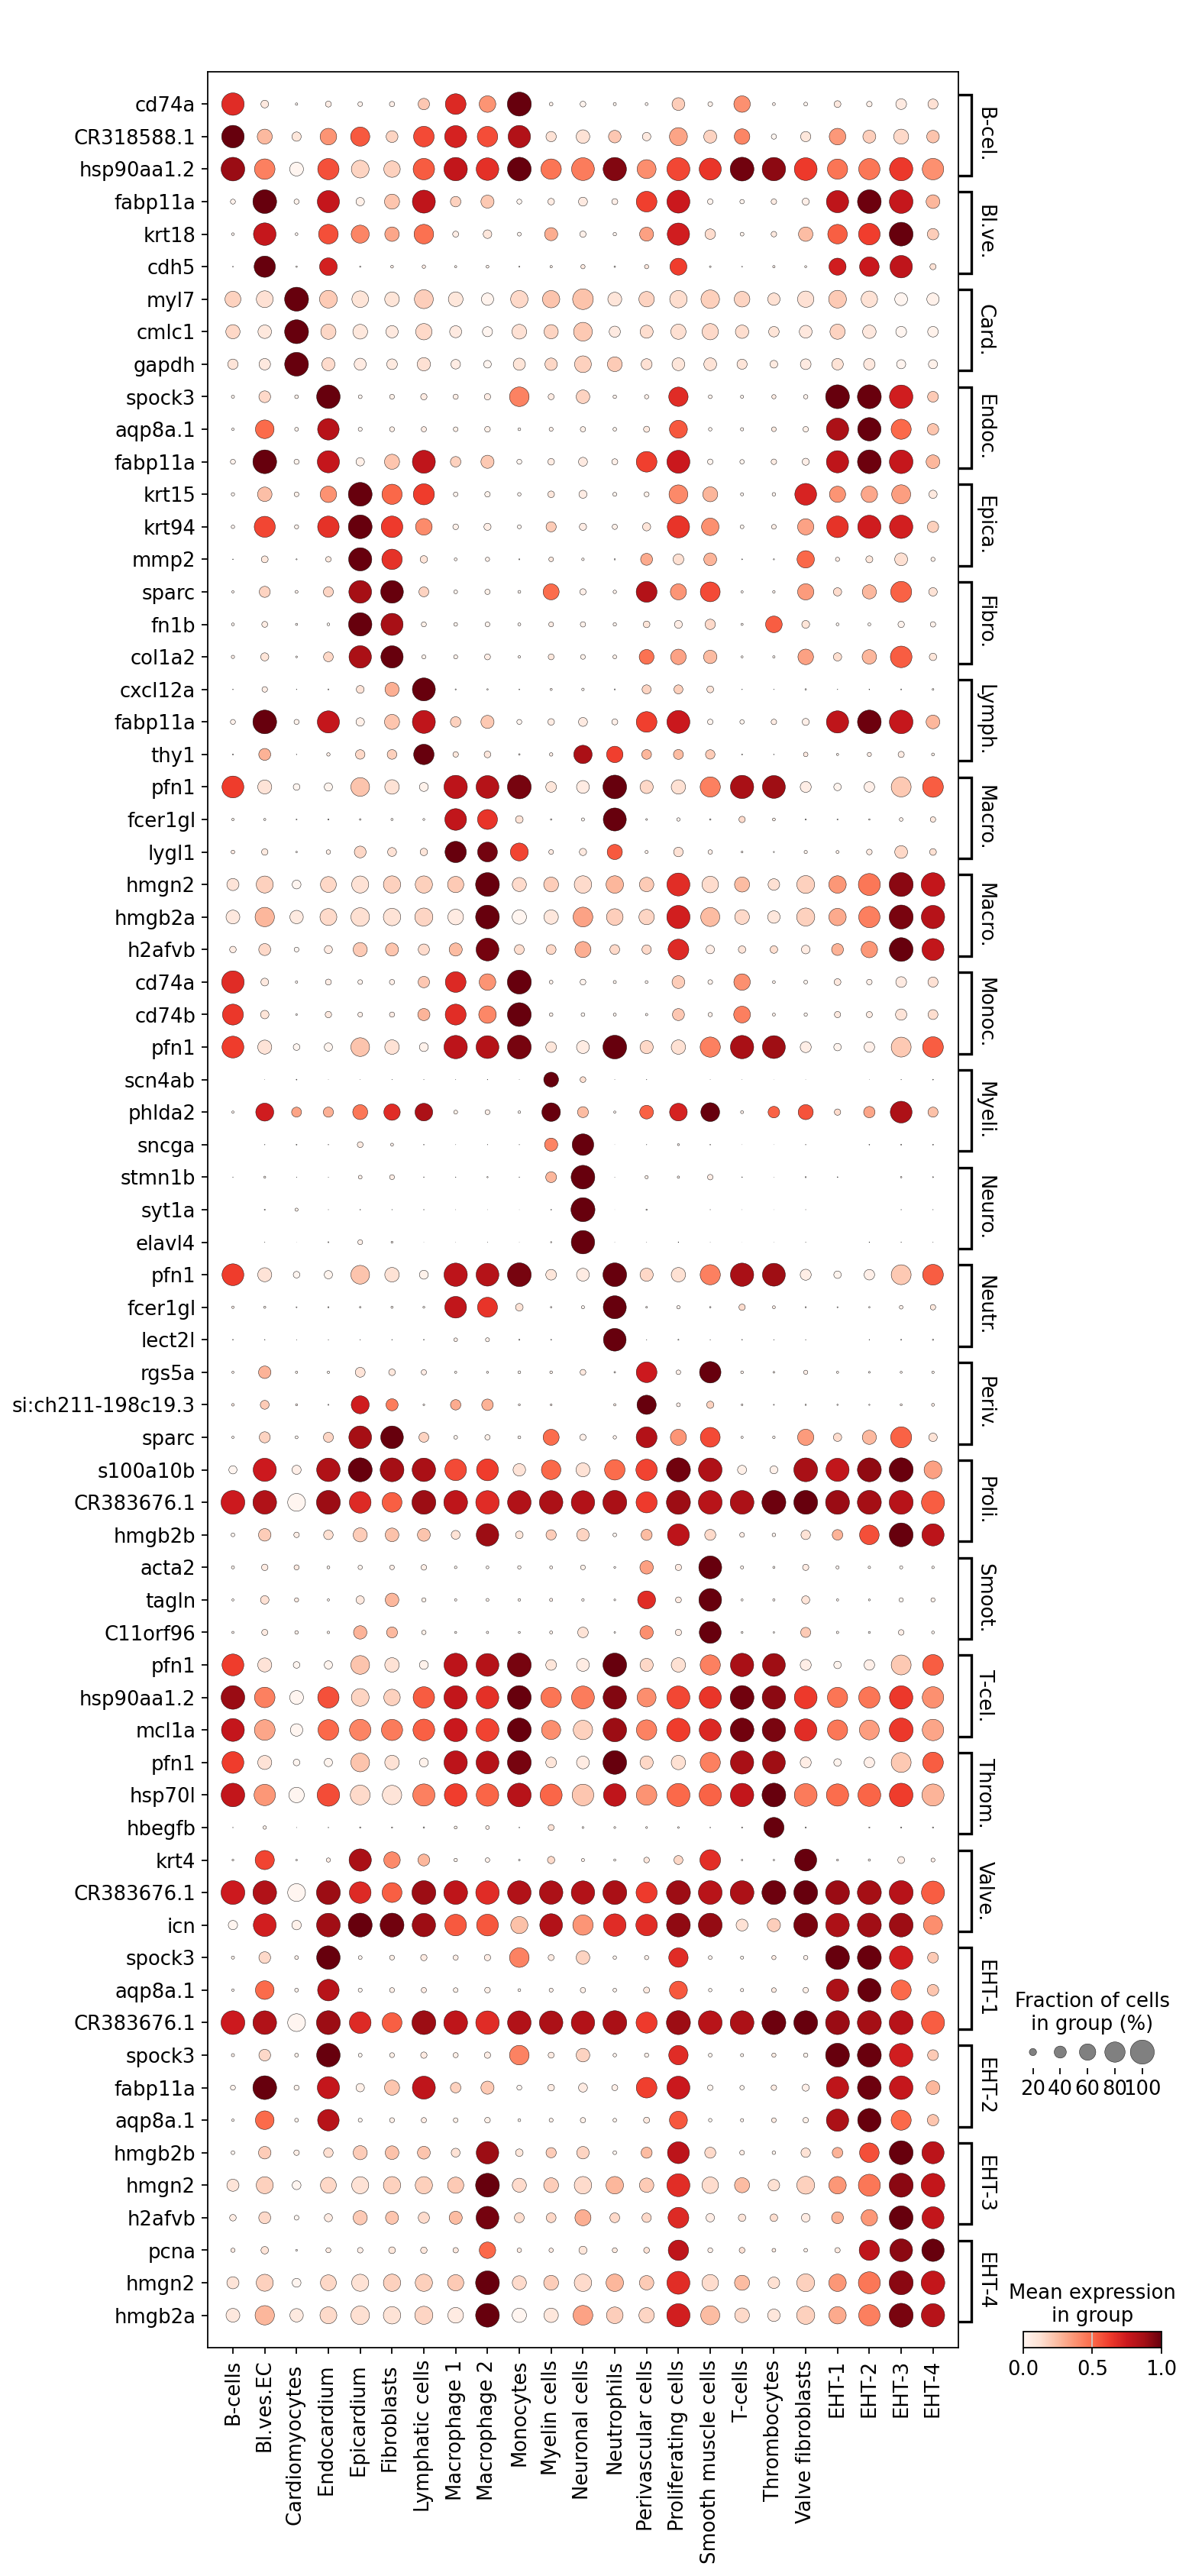

In [58]:
sc.pl.rank_genes_groups_dotplot(all_c,key='DE_CT_Final',n_genes=3,standard_scale='var',groupby='CT_Final',
                               save='markers_CT_Final_swap.pdf',dendrogram=False,swap_axes=True)

In [59]:
all_c.write('./write/All_outer_leidenv2.h5ad')